### Preliminary Exploratory Analysis
##### Objective: Train a Convolutional Neural Network to conduct Binary-Classification from Maritime Vessel Satelite Imagery
##### Method: Binary Classification & Transfer-Learning w.YOLO model

**Dataset:** This dataset contains a vast collection of 26.9k images, which have been carefully annotated for the specific purpose of ship detection. The bounding box annotations are presented in the YOLO format, which allows for accurate and efficient detection of the ships in the images. The dataset has been curated to include images of only one class - "ship" - thus enabling streamlined and precise analysis.

**Transfer Learning:** YOLOv8 can be fine-tuned for specific object detection tasks. Fine-tuning involves taking a pre-trained YOLOv8 model and further training it on a custom dataset related to the particular objects of interest. The process typically includes preparing the dataset, configuring the YOLOv8 model for the task, and training the model on the new data. Fine-tuning allows users to adapt the model to their specific use case, achieving better performance on their target objects.

###### Step 1. Preparing the Dataset
- train directory with images and corresponding label files
- valid directory with images and corresponding label files
- test directory with images and corresponding label files
- data.yaml file with correct paths and class names

In [1]:
import torch
from ultralytics import YOLO


##### Finetuning YOLOv8 on the Dataset
#### Parameters:
- data: Path to the data.yaml file.
- epochs: Number of training epochs.
- imgsz: Image size for training.
- batch: Batch size (adjust based on the GPU memory)
- name: Name of training run

In [2]:
###### Step 2. Setting up YOLOv8 for Transfer Learning
model = YOLO('yolov8n.pt')  # Nano model is lightweight
model.train(
    data='/home/jbenyam/cnnsat/data/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    project= '/home/jbenyam/cnnsat/runs',
    name='yolov8_ship_detection_v2',
    verbose=True
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 7.07MB/s]


Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jbenyam/cnnsat/data/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jbenyam/cnnsat/runs, name=yolov8_ship_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

100%|██████████| 755k/755k [00:00<00:00, 1.28MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning /home/jbenyam/cnnsat/data/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:06<00:00, 1515.68it/s]

train: WARNING ⚠️ /home/jbenyam/cnnsat/data/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0248994]
train: WARNING ⚠️ /home/jbenyam/cnnsat/data/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0078689]
train: New cache created: /home/jbenyam/cnnsat/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jbenyam/cnnsat/data/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:01<00:00, 1332.66it/s]

val: New cache created: /home/jbenyam/cnnsat/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /home/jbenyam/cnnsat/runs/yolov8_ship_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/jbenyam/cnnsat/runs/yolov8_ship_detection
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.77G      1.819      2.628      1.618          8        640: 100%|██████████| 1212/1212 [00:55<00:00, 21.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 19.40it/s]

                   all       2165       3720       0.32      0.271      0.226      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.71G      1.828       1.87      1.637          7        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 19.38it/s]

                   all       2165       3720      0.601        0.2      0.246      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.68G      1.753      1.708      1.563         10        640: 100%|██████████| 1212/1212 [00:50<00:00, 23.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.98it/s]


                   all       2165       3720      0.399      0.233      0.238      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.87G      1.698        1.6      1.529          8        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.28it/s]

                   all       2165       3720      0.321      0.308      0.271      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.75G        1.6      1.464      1.461          6        640: 100%|██████████| 1212/1212 [00:50<00:00, 24.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.69it/s]


                   all       2165       3720      0.491      0.333      0.359      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.71G      1.536      1.361      1.418          8        640: 100%|██████████| 1212/1212 [00:49<00:00, 24.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.99it/s]


                   all       2165       3720      0.532      0.335      0.378       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.88G      1.487      1.297      1.385         25        640: 100%|██████████| 1212/1212 [00:49<00:00, 24.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.62it/s]


                   all       2165       3720       0.53      0.348       0.38      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.59G      1.449      1.224      1.351          7        640: 100%|██████████| 1212/1212 [00:50<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.08it/s]

                   all       2165       3720      0.476      0.371      0.385      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         2G      1.405      1.178      1.319          7        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.69it/s]

                   all       2165       3720      0.511      0.392      0.417      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       1.9G      1.361       1.11      1.291         13        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.49it/s]


                   all       2165       3720      0.538      0.396       0.43      0.255

10 epochs completed in 0.163 hours.
Optimizer stripped from /home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/last.pt, 6.2MB
Optimizer stripped from /home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.pt, 6.2MB

Validating /home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.pt...
Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.24it/s]


                   all       2165       3720      0.539      0.396      0.431      0.255
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/jbenyam/cnnsat/runs/yolov8_ship_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5d342e4d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

##### Saving the Model

In [6]:
import torch

# Save the model weights
#torch.save(model.model.state_dict(), '/home/jbenyam/cnnsat/models/yolov8_ship_detection.pth')

# Export the model in TorchScript format
model.export(format='torchscript')  # TorchScript export, will save in the current directory


Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i9-14900KF)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 0.6s, saved as '/home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.torchscript' (11.9 MB)

Export complete (2.0s)
Results saved to /home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights
Predict:         yolo predict task=detect model=/home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.torchscript imgsz=640 data=/home/jbenyam/cnnsat/data/data.yaml  
Visualize:       https://netron.app


'/home/jbenyam/cnnsat/runs/yolov8_ship_detection/weights/best.torchscript'

## Baseline Model Evaluation

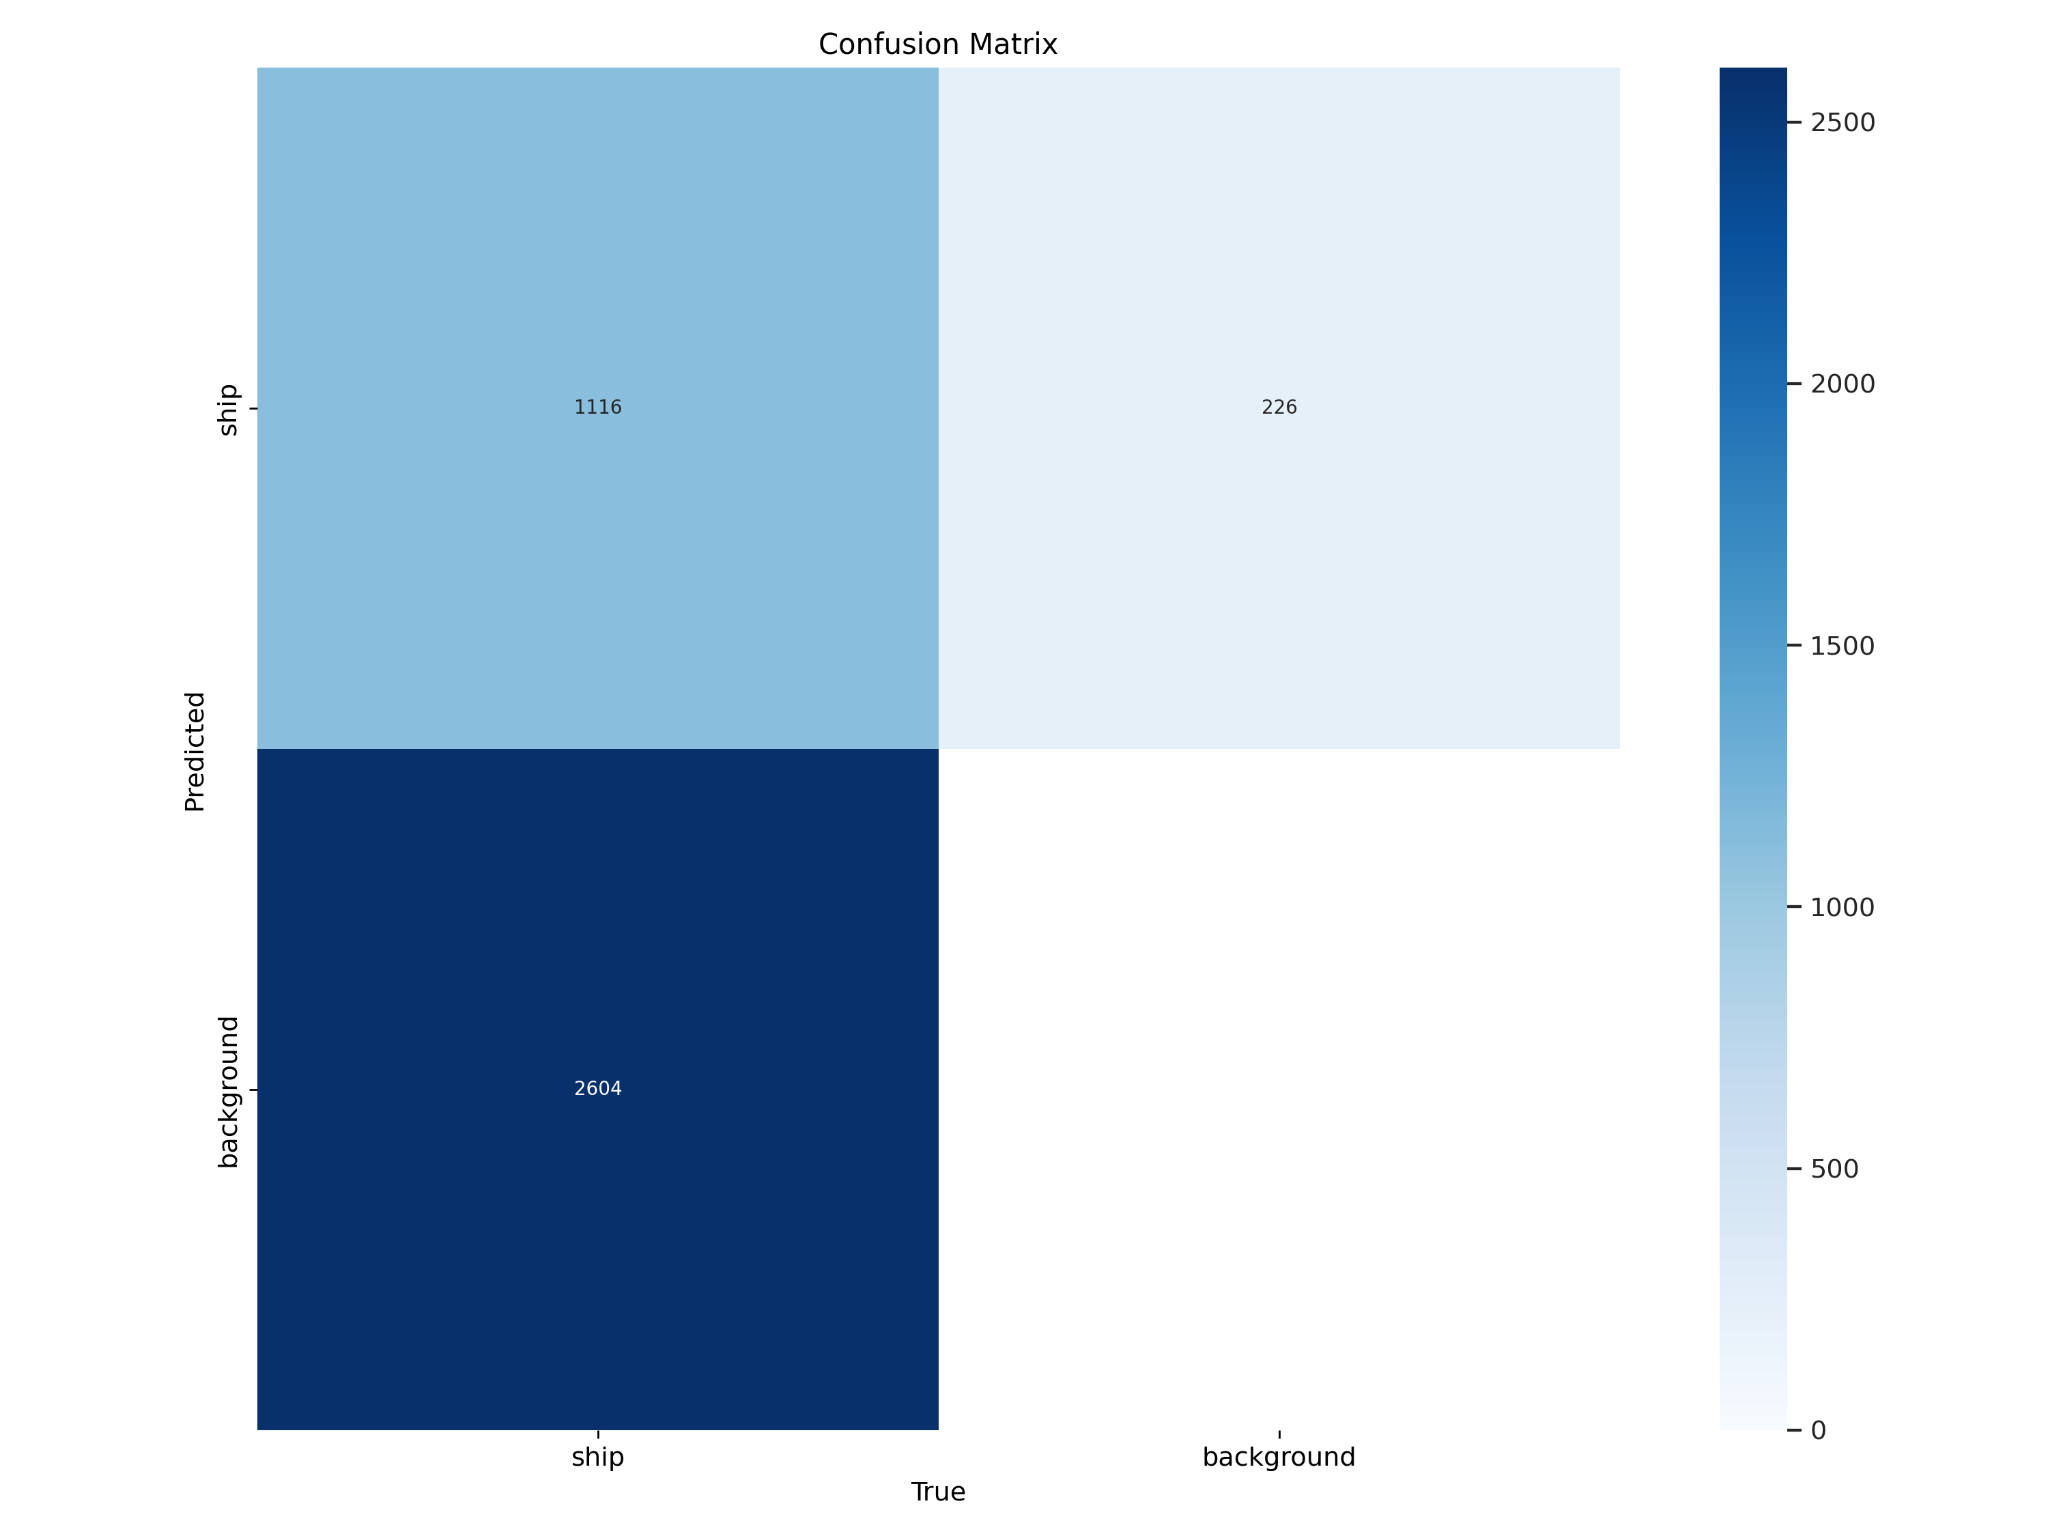

#### Evaluation of Baseline Confusion Matrix:
- True Positives (Top-left: ship predicted as ship): The model correctly identified 1,116 instances where a ship was present, and it predicted "ship" accurately.
This is a positive outcome for your model, as these predictions were correct.

- False Negatives (Bottom-left: ship predicted as background):

There are 2,604 instances where a ship was present, but the model incorrectly predicted "background."

This is a significant source of error, as the model failed to detect the ships in these cases.

False Positives (Top-right: background predicted as ship): The model predicted 226 instances of background as "ship."  

- These are false positives where the model incorrectly identified non-ship objects as ships.

True Negatives (Bottom-right: background predicted as background):

It appears that the model had no cases of true negatives. This suggests the absence of any instances where the background was correctly classified as background, which might indicate a dataset imbalance or issue in how the confusion matrix was computed.

#### Key insights:

High False Negative Rate: The model has a large number of ships that were misclassified as background, indicating that it may not be sensitive enough in detecting ships.

False Positives: The model has some misclassifications where it incorrectly detected ships in non-ship areas.

True Positive Rate: While the model correctly detected ships, the high false negative count significantly impacts its performance.

#### Suggestions:

Model Improvement: You may need to adjust your model to improve sensitivity toward ships, potentially by tuning hyperparameters, collecting more ship data, or augmenting your dataset.

Class Imbalance: The confusion matrix hints at a possible class imbalance (many more background instances), which could explain the large number of false negatives. Techniques such as resampling or weighted loss functions might help.

##### Loading Model & Testing Inference

In [ ]:
# Using PyTorch
model = YOLO('yolov8n.pt')  # Initialize the model architecture
model.model.load_state_dict(torch.load('/home/jbenyam/cnnsat/models/yolov8_ship_detection.pth'))

results = model.predict(source='path_to_test_image.jpg', show=True) # Update with the path to your test image
print(results)


### Model Training v2 - Increasing Epoch size to 100

In [7]:
###### Step 2. Setting up YOLOv8_v2 for Transfer Learning
model = YOLO('yolov8n.pt')  # Nano model is lightweight
model.train(
    data='/home/jbenyam/cnnsat/data/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    project= '/home/jbenyam/cnnsat/runs',
    name='yolov8_ship_detection_v2',
    verbose=True
)


Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jbenyam/cnnsat/data/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jbenyam/cnnsat/runs, name=yolov8_ship_detection_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

train: Scanning /home/jbenyam/cnnsat/data/train/labels.cache... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/jbenyam/cnnsat/data/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0248994]
train: WARNING ⚠️ /home/jbenyam/cnnsat/data/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0078689]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jbenyam/cnnsat/data/valid/labels.cache... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.09G      1.724      2.723      1.524         15        640: 100%|██████████| 1212/1212 [01:04<00:00, 18.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.69it/s]


                   all       2165       3720      0.421      0.306      0.288      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.01G      1.702      1.916      1.503          8        640: 100%|██████████| 1212/1212 [01:04<00:00, 18.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:10<00:00, 13.53it/s]


                   all       2165       3720      0.457      0.316      0.301      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.12G      1.794      1.824      1.573          9        640: 100%|██████████| 1212/1212 [01:01<00:00, 19.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 17.84it/s]


                   all       2165       3720      0.348       0.26      0.243      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.88G       1.84      1.828       1.61         24        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.30it/s]


                   all       2165       3720      0.384      0.264      0.259      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.26G      1.778      1.691      1.568         15        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.13it/s]

                   all       2165       3720      0.435      0.352      0.338      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.7G      1.745      1.664      1.552         21        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.90it/s]


                   all       2165       3720       0.41      0.337      0.322      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.3G      1.689      1.546       1.51          8        640: 100%|██████████| 1212/1212 [00:55<00:00, 21.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.66it/s]

                   all       2165       3720      0.502       0.36      0.363       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       1.8G      1.659      1.511      1.499         19        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 19.21it/s]


                   all       2165       3720      0.475      0.361      0.356      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.74G      1.631      1.462       1.48         20        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.55it/s]

                   all       2165       3720      0.418      0.376      0.353      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.87G      1.616      1.451      1.462         21        640: 100%|██████████| 1212/1212 [01:01<00:00, 19.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 17.28it/s]

                   all       2165       3720      0.532      0.358      0.384      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.75G      1.588      1.394      1.445          7        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.49it/s]

                   all       2165       3720      0.493      0.345      0.382      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.88G      1.579      1.371      1.429         23        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 16.86it/s]

                   all       2165       3720      0.519      0.387      0.395      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.46G      1.567      1.365      1.421         10        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 17.03it/s]

                   all       2165       3720      0.513      0.372      0.394      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.25G      1.553      1.342      1.416         12        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.32it/s]


                   all       2165       3720      0.522      0.365        0.4      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.63G      1.537      1.323      1.409         17        640: 100%|██████████| 1212/1212 [01:01<00:00, 19.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.25it/s]

                   all       2165       3720      0.511      0.368      0.396       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.73G      1.518      1.295      1.406         17        640: 100%|██████████| 1212/1212 [01:01<00:00, 19.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 16.97it/s]

                   all       2165       3720      0.541        0.4      0.418       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.82G      1.515      1.285      1.391         25        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.51it/s]

                   all       2165       3720      0.551      0.418      0.427      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.21G      1.495       1.27       1.38         14        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.92it/s]

                   all       2165       3720      0.517      0.394      0.409      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.92G      1.476       1.24      1.375         25        640: 100%|██████████| 1212/1212 [01:00<00:00, 19.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 16.28it/s]

                   all       2165       3720       0.54      0.406      0.417      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.92G      1.474      1.245      1.375         23        640: 100%|██████████| 1212/1212 [01:03<00:00, 19.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 15.92it/s]

                   all       2165       3720      0.559      0.395      0.426      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.84G      1.476      1.252      1.371         22        640: 100%|██████████| 1212/1212 [01:02<00:00, 19.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.53it/s]

                   all       2165       3720      0.553      0.395      0.424      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.78G      1.461      1.216      1.359         15        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.31it/s]

                   all       2165       3720      0.537      0.405      0.429      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.57G      1.449      1.208      1.351         19        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.37it/s]

                   all       2165       3720      0.531      0.408      0.428      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.83G      1.453      1.197      1.348         15        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.30it/s]


                   all       2165       3720       0.56      0.429      0.443      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.48G      1.452      1.203      1.353         12        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.86it/s]


                   all       2165       3720      0.538      0.421       0.44      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.81G      1.449      1.191      1.345         12        640: 100%|██████████| 1212/1212 [00:57<00:00, 20.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.90it/s]


                   all       2165       3720      0.545      0.418      0.445      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.19G      1.437      1.183      1.334         10        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.05it/s]

                   all       2165       3720      0.542      0.441      0.446      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       1.6G      1.422      1.166      1.328         23        640: 100%|██████████| 1212/1212 [00:56<00:00, 21.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:09<00:00, 15.07it/s]

                   all       2165       3720      0.583       0.41      0.448      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.9G      1.425      1.168      1.327         34        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.55it/s]

                   all       2165       3720      0.548      0.421      0.447      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.16G      1.425       1.16      1.323          7        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.09it/s]

                   all       2165       3720      0.575      0.429      0.456      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       1.9G      1.411       1.15      1.323         19        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.65it/s]

                   all       2165       3720      0.549      0.444      0.452      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G      1.408      1.139      1.316         45        640: 100%|██████████| 1212/1212 [01:01<00:00, 19.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.45it/s]

                   all       2165       3720      0.535       0.45       0.45      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.95G      1.396      1.138      1.311         20        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.82it/s]

                   all       2165       3720      0.558      0.453      0.459      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.09G      1.404      1.131      1.313         12        640: 100%|██████████| 1212/1212 [00:55<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.26it/s]

                   all       2165       3720      0.574      0.446      0.462       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.21G      1.401      1.122      1.306         13        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.25it/s]


                   all       2165       3720      0.567      0.446      0.458      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.71G      1.386      1.128      1.299         10        640: 100%|██████████| 1212/1212 [00:57<00:00, 20.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 16.99it/s]

                   all       2165       3720      0.556      0.456      0.464      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.1G      1.383        1.1      1.304         16        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.47it/s]

                   all       2165       3720      0.558       0.48      0.469      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.82G      1.365      1.091       1.29         18        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.04it/s]

                   all       2165       3720       0.53      0.469      0.462      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.88G      1.379      1.101      1.295         15        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.38it/s]

                   all       2165       3720      0.538      0.464      0.465      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.06G      1.378      1.108      1.297         18        640: 100%|██████████| 1212/1212 [00:55<00:00, 21.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.25it/s]

                   all       2165       3720      0.562       0.47      0.467      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.98G      1.378       1.09       1.29          7        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.88it/s]

                   all       2165       3720      0.573      0.449      0.471      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.75G      1.353      1.082      1.285          6        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.89it/s]

                   all       2165       3720       0.58      0.452      0.476      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.12G      1.358      1.078      1.278         19        640: 100%|██████████| 1212/1212 [01:00<00:00, 19.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.29it/s]

                   all       2165       3720      0.569      0.472      0.476      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.78G      1.348      1.063      1.277         18        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.44it/s]

                   all       2165       3720      0.564      0.456      0.475      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.72G      1.338      1.063       1.28         13        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.08it/s]

                   all       2165       3720      0.575      0.479       0.48      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.86G      1.337      1.057      1.278          9        640: 100%|██████████| 1212/1212 [00:59<00:00, 20.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.98it/s]

                   all       2165       3720      0.558      0.462      0.475      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.86G      1.342      1.056      1.269          9        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.26it/s]

                   all       2165       3720      0.569      0.488      0.484      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.61G       1.34      1.055      1.273         20        640: 100%|██████████| 1212/1212 [00:57<00:00, 20.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.33it/s]

                   all       2165       3720       0.56      0.471      0.478      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.77G      1.336      1.054      1.266         14        640: 100%|██████████| 1212/1212 [00:56<00:00, 21.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.20it/s]

                   all       2165       3720      0.547      0.488      0.478      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.86G      1.327      1.031      1.269         17        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.22it/s]

                   all       2165       3720      0.548      0.483      0.479      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.1G      1.336      1.043      1.263         20        640: 100%|██████████| 1212/1212 [00:56<00:00, 21.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.45it/s]

                   all       2165       3720      0.565      0.482      0.483      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.88G       1.32      1.037      1.264         21        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.70it/s]


                   all       2165       3720      0.572      0.476      0.484       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.86G      1.323      1.038       1.26         54        640: 100%|██████████| 1212/1212 [00:57<00:00, 20.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.31it/s]

                   all       2165       3720      0.565      0.472      0.487      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.96G      1.308       1.02      1.259         13        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.97it/s]


                   all       2165       3720      0.553      0.478      0.483      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.07G      1.311      1.021      1.247         24        640: 100%|██████████| 1212/1212 [00:58<00:00, 20.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.81it/s]

                   all       2165       3720      0.551      0.489      0.483      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.92G      1.303      1.022      1.252         19        640: 100%|██████████| 1212/1212 [01:00<00:00, 20.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.55it/s]

                   all       2165       3720      0.555      0.477      0.481       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.07G      1.299     0.9984      1.245         16        640: 100%|██████████| 1212/1212 [00:57<00:00, 21.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 17.99it/s]

                   all       2165       3720      0.554      0.482      0.485      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       1.7G      1.301      1.005      1.249         18        640: 100%|██████████| 1212/1212 [00:57<00:00, 21.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.25it/s]

                   all       2165       3720      0.547       0.49      0.482      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.79G      1.302          1      1.247         15        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.79it/s]


                   all       2165       3720      0.549      0.492      0.485      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.93G      1.272     0.9843      1.238        216        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 17.37it/s]

                   all       2165       3720      0.548      0.484      0.485      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.94G      1.296     0.9912      1.238         18        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.31it/s]


                   all       2165       3720      0.558      0.485      0.488      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.73G      1.278     0.9858      1.243          8        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 19.12it/s]

                   all       2165       3720      0.557      0.496      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       1.7G      1.269     0.9854      1.235         11        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.51it/s]

                   all       2165       3720      0.566      0.496      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.18G      1.277     0.9882       1.24         15        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.26it/s]

                   all       2165       3720      0.574      0.484      0.491      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.27G      1.269     0.9762      1.228         22        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.97it/s]

                   all       2165       3720      0.575      0.482      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.99G      1.272     0.9786      1.228         20        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.61it/s]


                   all       2165       3720      0.575      0.479      0.493      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.79G       1.26     0.9686      1.226         11        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.08it/s]

                   all       2165       3720      0.574      0.478       0.49      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.99G      1.273     0.9702      1.222         14        640: 100%|██████████| 1212/1212 [00:52<00:00, 22.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.44it/s]

                   all       2165       3720      0.575      0.482      0.492      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.51G      1.257     0.9598      1.226         37        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.93it/s]

                   all       2165       3720      0.567      0.489      0.493      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.82G      1.252     0.9549      1.222         14        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.71it/s]

                   all       2165       3720      0.559       0.49      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.87G      1.256     0.9539      1.217         21        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.54it/s]

                   all       2165       3720      0.566      0.489      0.494        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.02G      1.242     0.9521      1.215          9        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.07it/s]

                   all       2165       3720       0.56      0.497      0.496      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.71G       1.25     0.9523      1.217         25        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.30it/s]

                   all       2165       3720      0.561      0.496      0.494        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.75G      1.242       0.94      1.208         21        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.24it/s]

                   all       2165       3720      0.563      0.494      0.496      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.64G      1.234     0.9328      1.206         20        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.14it/s]

                   all       2165       3720      0.563      0.493      0.495      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.2G       1.23     0.9261      1.207         11        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.78it/s]

                   all       2165       3720      0.564      0.499      0.498      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.86G      1.237     0.9337      1.208         15        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.77it/s]


                   all       2165       3720      0.566      0.498      0.499      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G      1.224     0.9112      1.203         18        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.77it/s]

                   all       2165       3720      0.561      0.498      0.496      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.33G      1.211     0.9172      1.196         18        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.90it/s]

                   all       2165       3720      0.565      0.499      0.498      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.93G      1.216     0.9101      1.201         25        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.92it/s]

                   all       2165       3720      0.564      0.501      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.85G      1.207      0.906        1.2         18        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.39it/s]

                   all       2165       3720      0.562        0.5      0.498      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.54G      1.206     0.9148      1.197         11        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.45it/s]

                   all       2165       3720      0.561      0.501      0.498      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.72G      1.201     0.8936      1.194          9        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.52it/s]


                   all       2165       3720      0.564        0.5      0.498      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.73G      1.213     0.9117      1.193         19        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 19.73it/s]

                   all       2165       3720      0.566      0.501      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.49G      1.187     0.8973      1.183         21        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.79it/s]

                   all       2165       3720      0.565        0.5      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.88G      1.201     0.8943      1.188         12        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.07it/s]

                   all       2165       3720      0.562      0.503      0.498      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.12G      1.186     0.8946      1.189         18        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.02it/s]

                   all       2165       3720      0.565      0.502      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.62G      1.187     0.8876      1.183          9        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.86it/s]

                   all       2165       3720      0.566      0.504      0.501      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.76G      1.172     0.8663      1.179         14        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.24it/s]

                   all       2165       3720      0.563      0.506      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.82G      1.177     0.8775      1.177         12        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.27it/s]

                   all       2165       3720      0.563      0.506      0.499      0.303


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.65G      1.155     0.8248      1.146         16        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.68it/s]

                   all       2165       3720      0.561      0.508      0.498      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.82G      1.137     0.8069      1.141          7        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.56it/s]

                   all       2165       3720      0.561      0.504      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.65G      1.138     0.8017      1.139          5        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 20.57it/s]

                   all       2165       3720      0.558      0.506      0.498      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.06G      1.124     0.7927      1.133          7        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.65it/s]

                   all       2165       3720       0.56      0.505      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.93G      1.122      0.785      1.129          7        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:07<00:00, 18.68it/s]

                   all       2165       3720      0.563      0.503      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.67G      1.116     0.7862      1.129          8        640: 100%|██████████| 1212/1212 [00:53<00:00, 22.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.72it/s]

                   all       2165       3720      0.562      0.501      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       1.7G      1.112     0.7699      1.123         15        640: 100%|██████████| 1212/1212 [00:51<00:00, 23.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.41it/s]


                   all       2165       3720      0.561      0.502      0.498      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.88G      1.112     0.7783      1.125         13        640: 100%|██████████| 1212/1212 [00:54<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.57it/s]

                   all       2165       3720      0.561      0.503      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       1.9G        1.1     0.7673      1.123          8        640: 100%|██████████| 1212/1212 [00:55<00:00, 21.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.39it/s]

                   all       2165       3720      0.561      0.503      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.82G      1.094     0.7589      1.121          8        640: 100%|██████████| 1212/1212 [00:52<00:00, 23.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:06<00:00, 21.62it/s]

                   all       2165       3720      0.562      0.502      0.499      0.304



100 epochs completed in 1.745 hours.
Optimizer stripped from /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/last.pt, 6.3MB
Optimizer stripped from /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.pt, 6.3MB

Validating /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.pt...
Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:08<00:00, 15.89it/s]


                   all       2165       3720      0.565      0.499      0.499      0.304
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5d34de26e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
# Export the model in TorchScript format
model.export(format='torchscript')  # TorchScript export, will save in the current directory


Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CPU (Intel Core(TM) i9-14900KF)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 0.7s, saved as '/home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.torchscript' (11.9 MB)

Export complete (2.2s)
Results saved to /home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights
Predict:         yolo predict task=detect model=/home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.torchscript imgsz=640 data=/home/jbenyam/cnnsat/data/data.yaml  
Visualize:       https://netron.app


'/home/jbenyam/cnnsat/runs/yolov8_ship_detection_v2/weights/best.torchscript'